<a href="https://colab.research.google.com/github/arkeodev/XAI/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Explainable AI

Explainable AI (XAI) refers to methods and techniques in the field of artificial intelligence (AI) that make the outputs of machine learning models understandable to humans.

As AI systems are deployed in more sensitive and high-stakes areas such as healthcare, finance, and legal systems, the need for accountability, trust, and fairness in AI decisions has become paramount. Here are some reasons why XAI is becoming more important:

1. Trust and Reliability
2. Compliance and Regulation
3. Debugging and Improvement
4. Ethical Considerations
5. Collaborative Human-AI Decision Making


# The Balance Between Accuracy and Interpretability

<figure>
    <img src="https://raw.githubusercontent.com/arkeodev/XAI/main/images/balance_between_accuracy_and_interprebality.png#:~:text=Copy-,permalink,-%E2%8C%98" width="800" height="500" alt="Balance between accuracy and interpretability of models">
    <figcaption>Balance between accuracy of models and interpretability of models</figcaption>
</figure>

The balance between accuracy and interpretability in AI, as illustrated in the image, highlights a fundamental trade-off:

**complex models** like neural networks achieve high accuracy but are less interpretable, making it challenging to understand their decision-making processes.

**simpler models** like decision trees and linear regression offer greater interpretability, albeit sometimes at the expense of accuracy.

## Black Box vs. White Box Models

### Black Box Models

**Definition:** Models whose internal workings are not transparent or easily interpretable. They are complex, making it difficult to understand how inputs are processed to produce outputs.

**Importance:** While they can achieve high accuracy, especially in complex tasks, their lack of transparency is a challenge for trust, accountability, and compliance in critical applications.

**Examples:**

Deep Neural Networks (DNNs): Used for tasks like image recognition and natural language processing, but their multi-layered structure makes them inherently difficult to interpret.

Ensemble Models (e.g., Random Forests): Aggregate the decisions of multiple models, which increases predictive power but complicates understanding of the decision-making process.

### White Box Models

**Definition:** Models that are inherently transparent, with their internal mechanics easily understandable by humans. The process from input to output is clear, making these models preferable for situations requiring interpretability.

**Importance:** Essential for applications where understanding the decision-making process is as important as the decision itself, such as in healthcare or criminal justice. They facilitate trust, debugging, and compliance.

**Examples:**

Linear Regression: Provides a clear equation where the contribution of each feature is directly understandable.

Decision Trees: Offer a straightforward, rule-based approach to decision-making, where the path from input to output is easily traceable.

# Categorization in XAI

## Agnosticity

- `Model-agnostic`: Applicable to all model types. _These methods can be used with any type of machine learning model without specific tailoring._
- `Model-specific`: Only applicable to a specific model type. _These techniques are designed for particular model architectures._


## Scope

- `Global explanation`: Explaining the whole model. _This provides an overview of how the model makes decisions on a general level._
- `Local explanation`: Explaining individual predictions. _Focuses on explaining the decision-making process for a single instance._

<figure>
    <img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/global_vs_local.png" width="400" height="250" alt="The scope of interpretability">
    <figcaption>Global vs Local Interpretability</figcaption>
</figure>

## Data type

- `Graph`: _Used for models that process data in the form of graphs or networks._
- `Image`: _Applicable for models that work with image data._
- `Text / Speech`: _Covers models designed to understand and generate text or speech._
- `Tabular`: _Refers to models dealing with structured data arranged in tables._


## Explanation type

- `Visual`: _This involves using visual tools to illustrate the model's workings._
- `Data points`: _Highlights specific data points to explain model predictions._
- `Feature importance`: _Shows which features are most influential in the model's predictions._
- `Surrogate models`: _Involves creating a simpler model that approximates the behavior of the complex one._


# Demo of By-design Interpretable White Box Models



> The source code is taken from: https://github.com/deepfindr/xai-series



In [2]:
! pip install interpret -q
! pip install lime -q
! pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
# Imports

import pandas as pd
# Makes sure we see all columns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler


The Microsoft InterpretML package is an open-source toolkit designed for both creating interpretable machine learning models and explaining blackbox systems.

It offers a variety of tools and models under two main categories:

- glassbox models, which are inherently interpretable
- blackbox explainers for elucidating the behavior of complex models

In [4]:
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree,
                                ExplainableBoostingClassifier)
from interpret import show

In [ ]:
# Utils
class DataLoader():
    def __init__(self):
        self.data = None

    def load_dataset(self, path="https://raw.githubusercontent.com/arkeodev/XAI/main/data/healthcare-dataset-stroke-data.csv"):
        self.data = pd.read_csv(path)

    def preprocess_data(self):
        # One-hot encode all categorical columns
        categorical_cols = ["gender",
                            "ever_married",
                            "work_type",
                            "Residence_type",
                            "smoking_status"]
        encoded = pd.get_dummies(self.data[categorical_cols],
                                prefix=categorical_cols)

        # Update data with new columns
        self.data = pd.concat([encoded, self.data], axis=1)
        self.data.drop(categorical_cols, axis=1, inplace=True)

        # Impute missing values of BMI
        self.data.bmi = self.data.bmi.fillna(0)

        # Drop id as it is not relevant
        self.data.drop(["id"], axis=1, inplace=True)

        # Standardization
        # Usually we would standardize here and convert it back later
        # But for simplification we will not standardize / normalize the features

    def get_data_split(self):
        X = self.data.iloc[:,:-1]
        y = self.data.iloc[:,-1]
        return train_test_split(X, y, test_size=0.20, random_state=2021)

    def oversample(self, X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='minority')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over


In [ ]:
# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print("After oversampling:", X_train.shape)

(4088, 21)
(1022, 21)
After oversampling: (7778, 21)


## The general code workflow

1. `Fitting` the logistic regression model on the training data.
2. `Evaluating` the model's performance on the test data using F1 Score and Accuracy as metrics. F1 Score is critical because of imbalance dataset.
3. Using the `explain_local` method to explain ***individual predictions*** for the first 100 instances in the test set.
4. Using the `explain_global` method to explain the behavior of the ***model on a global scale***.

## The outputs are visual explanations

- **The first part** shows a local explanation with a horizontal bar chart for a single prediction, indicating the contribution of each feature to the logistic regression model's predicted probability for that instance.

- Positive contributions increase the probability of the positive class, while negative contributions decrease it.

- The actual and predicted probabilities are equal, suggesting that the model is fairly confident in this particular prediction.

<table>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/lr_local_explanation.png" alt="Logistic Regression local explanation" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/classifier_tree.png" alt="Classifier Tree Local Explanation" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/ebm_local_explanation.png" alt="EBM Local Explanation" width="600" /></td>
</tr>
</table>

- **The second part** seems to be the partial dependence plots for `individual features`. These plots show how the log-odds of the positive class changes as the value of a particular feature changes, all else being equal.

- The line chart indicates the relationship between the feature value and its contribution to the prediction score.

- The histogram at the bottom shows the distribution of the feature values in the dataset.

- The `show` function is a crucial part of `InterpretML`'s toolkit, allowing users to visualize explanations of the models' behaviors. This function can display both global explanations and local explanations.

<table>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/lr_age.png" alt="Logistic Regression age feature explanation" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/ebm_bmi.png" alt="EBM BMI feature  explanation" width="600" /></td>
</tr>
</table>


## Logistic Regression Demo

**LogisticRegression** and **ClassificationTree** are part of the glassbox models that InterpretML offers. These models are designed to be fully interpretable by default, allowing users to understand how input features affect the model's predictions.

In [ ]:
# %% Fit logistic regression model
lr = LogisticRegression(random_state=2021, feature_names=X_train.columns, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("Training finished.")

# %% Evaluate logistic regression model
y_pred = lr.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

# %% Explain local prediction
lr_local = lr.explain_local(X_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)

# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

Training finished.
F1 Score 0.5145183537889878
Accuracy 0.735812133072407


## Decision Tree Demo

In [ ]:
# %% Fit decision tree model
tree = ClassificationTree()
tree.fit(X_train, y_train)
print("Training finished.")
y_pred = tree.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

# %% Explain local prediction
tree_local = tree.explain_local(X_test[:100], y_test[:100], name='Tree')
show(tree_local)

Training finished.
F1 Score 0.5151539796139666
Accuracy 0.726027397260274


## Explainable Boosting Machine (Microsoft) Demo

**ExplainableBoostingClassifier (EBC)** is another glassbox model provided by InterpretML. It stands out for its balance between interpretability and performance, often delivering accuracy comparable to state-of-the-art machine learning models.

EBC is a tree-based, cyclic gradient boosting model that extends generalized additive models (GAM) with automatic interaction detection.

It operates by learning individual feature functions through modern techniques like bagging and boosting, making it highly interpretable and efficient.

In [ ]:
# %% Fit Explainable Boosting Machine
ebm = ExplainableBoostingClassifier(random_state=2021)
ebm.fit(X_train, y_train)
print("Training finished.")
y_pred = ebm.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

# %% Explain locally
ebm_local = ebm.explain_local(X_test[:100], y_test[:100], name='EBM')
show(ebm_local)

# %% Explain globally
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)
# %%

Training finished.
F1 Score 0.5807016177196126
Accuracy 0.9227005870841487


# Tools and Techniques for Explaining AI Models

## Local Interpretable Model-Agnostic Explanations (LIME)

### How Lime Works?

LIME, which stands for Local Interpretable Model-agnostic Explanations, is a technique introduced to explain the predictions of any classifier in an interpretable and faithful manner. The core idea behind LIME is to approximate the black-box model locally with an interpretable model (like linear models or decision trees), which then helps in understanding the prediction for an individual instance.

Here's a summary of how LIME works:

1. LIME is designed to be model-agnostic.

2. Instead of trying to interpret the entire model (which can be complex and non-linear), LIME focuses on explaining individual predictions. It does this by generating a new dataset consisting of perturbed samples around the instance being explained.

3. It obtains the predictions for these new points from the black-box model.

4. LIME then uses this new dataset to train an interpretable model, which is weighted by the proximity of the perturbed samples to the original instance. The goal is to ensure that the interpretable model closely approximates the black-box model’s predictions in the vicinity of the instance being explained.

5. The interpretable model, which is simple enough to be understood by humans (like a linear model with a few non-zero coefficients), serves as the explanation for the prediction.

6. The coefficients of the interpretable model represent the importance of each feature in affecting the prediction. By analyzing these coefficients, LIME identifies which features are most relevant to the model's decision-making process for the specific instance.

<figure>
    <img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/lime.png" width="600" height="375" alt="LIME Explanation">
    <figcaption>Lime Explanation</figcaption>
</figure>


### The Mathematical Formulation of LIME


Given a complex model \(f\) and an instance \(x\) for which we want to explain the prediction, the mathematical objective of LIME can be summarized as follows:

$$
\xi(x) = \underset{g \in G}{\mathrm{argmin}} \; L(f, g, \pi_x) + \Omega(g)
$$

Here's what each component of this formula represents:

- $(\xi(x))$: The explanation model for the instance $(x)$.
- $(f)$: The original complex model's prediction function.
- $(g)$: The interpretable model (e.g., a linear model) that approximates $(f)$ locally around $(x)$.
- $(G)$: The class of interpretable models (such as linear models, decision trees, etc.) from which $(g)$ is chosen.
- $(L)$: A loss function that measures how close the predictions of $(g)$ are to the predictions of $(f)$ for samples near $(x)$. This function ensures the fidelity of $(g)$ to $(f)$ in the vicinity of $(x)$.
- $(\pi_x)$: A proximity measure that defines the locality around $(x)$. It weighs the samples based on their closeness to $(x)$, ensuring that $(g)$ is an accurate approximation of $(f)$ near $(x)$ but not necessarily further away.
- $(\Omega(g))$: A complexity measure of the interpretable model $(g)$. It ensures that $(g)$ remains simple enough to be interpretable by humans. For instance, in the case of a linear model, $(\Omega)$ could penalize models with too many non-zero coefficients to maintain simplicity and interpretability.


1. **Proximity Weighted Loss Function $(L(f, g, \pi_x))$**: This function quantifies how well the interpretable model $(g)$ approximates the original model $(f)$ for perturbed samples around $(x)$. It incorporates the proximity measure $(\pi_x)$ to ensure that samples closer to $(x)$ have a higher influence on the model $(g)$. The exact form of $(L)$ can vary but often involves comparing the predictions of $(f)$ and $(g)$ for the perturbed samples, with a focus on those near $(x)$.

2. **Model Complexity $(\Omega(g))$**: To ensure the interpretability of $(g)$, LIME includes a penalty for complexity. The goal is to find a balance between fidelity to $(f)$ (accurately reflecting $(f)$'s behavior near $(x)$) and simplicity (ensuring $(g)$ is easy to understand).

  For linear regression for instance a desirable condition could be to have many zero-weighted input features. This helps to ignore most of the features and just including a few to makes our explanations simpler.

  For decision tree it would be nice to have a relatively small depth that helps to make tree understandable.

  Generally,in order to decrease the model complexity Lasso Regression technique is used.

3. **Optimization**: The optimization problem solved by LIME seeks to find the best $(g)$ in the class of models $(G)$ that minimizes the loss $(L)$ (ensuring closeness to $(f)$'s predictions) while also being simple $(\Omega(g)$ is low). This results in a model $(g)$ that provides an interpretable explanation of $(f)$'s prediction for the instance $(x)$.

<figure>
    <img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/lime_math.png" width="600" height="375" alt="LIME Math">
    <figcaption>Lime Math</figcaption>
</figure>

In essence, LIME's methodology bridges the gap between the accuracy of complex models and the necessity for transparency and interpretability in their predictions, especially for individual instances. Through this mathematical formulation, LIME provides a robust framework for generating local, interpretable explanations for the predictions of any classifier.

### LIME Implementation with lime Package

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from lime.lime_tabular import LimeTabularExplainer

# Load dataset and train model
iris = load_iris()
X_train, y_train = iris.data, iris.target
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Instantiate and use LIME to explain a prediction
explainer = LimeTabularExplainer(X_train, feature_names=iris.feature_names, class_names=iris.target_names, discretize_continuous=True)
exp = explainer.explain_instance(X_train[0], model.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)


### LIME Implementation with InterpretML Package



> `InterpretML` package uses `lime` package behind the scenes



In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show

# Load Iris dataset
bc = load_breast_cancer()
X, y = bc.data, bc.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Print out performance metrics
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

# Initialize Lime for Tabular data
lime = LimeTabular(model=rf, data=X_train, random_state=42)
print(f"Explanation Type: {lime.explainer_type}")

# Get local explanations for the last 5 instances of the test data
lime_local = lime.explain_local(X_test[-5:], y_test[-5:], name='LIME')

show(lime_local)


F1 Score: 0.9623015873015873
Accuracy: 0.9649122807017544
Explanation Type: blackbox


## SHapley Additive exPlanations (SHAP)

### What is SHAP and How it Works?

SHAP (SHapley Additive exPlanations) offers a unified framework to interpret the predictions of any machine learning model.

- SHapley Additive exPlanations bases on concept of game theory.
- Lloyd Stowell Shapley gave his name to this game theory model in the 1950s.
- The Shapley value is the marginal contribution of a feature to the model.
- The basic idea of shapley values is to calculate a player's contribution for each subset and then simply averaging over all of these contributions this gives us the marginal contribution of a player to the team so that's also called the marginal value.
- The intuition is that the contribution of adding the feature should be weighted more if already many features are included in that subset so that would tell us that this specific feature gives us a strong change in the prediction even if many other features are already included.

Two types of approximations are proposed for computing SHAP values:
1. **Model-Agnostic Approximations**: Methods that do not depend on the model's internal workings, such as Kernel SHAP, which uses weighted linear regression to estimate SHAP values based on simplifications like assuming feature independence.
2. **Model-Specific Approximations**: Methods that take advantage of the model's specific structure for more efficient computation, such as Deep SHAP for deep learning models, which combines DeepLIFT with Shapley values to approximate the contributions of features.

I'll try to dig into the first approximation.

### The Mathematical Foundation of SHAP

The SHAP (SHapley Additive exPlanations) values are grounded in the Shapley value formula from cooperative game theory. This formula assigns a fair payoff to each player (in our case, features of a model) based on their contribution to the total game (the prediction model's output). Let's break down the mathematical formulation of the Shapley value and then see how it translates into the SHAP value context.

#### The Shapley Value Formula

Given a cooperative game with a set of players (features) $(N)$ and a characteristic function $(v(S))$ that assigns a value (the prediction of the model) to each coalition $(S)$ of players, the Shapley value of player $(i)$ is given by:

$$
\phi_i(v) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! (|N| - |S| - 1)!}{|N|!} (v(S \cup \{i\}) - v(S))
$$

Where:
- $(N)$ is the set of all players (features).
- $(S)$ is a subset of $(N)$ not including player $(i)$.
- $|S|$ is the number of players in $(S)$.
- $|N|$ is the total number of players.
- $(v(S))$ is the value function, representing the prediction of the subset $(S)$.
- $(v(S \cup \{i\}) - v(S))$ represents the marginal contribution of player $(i)$ when added to subset $(S)$.
- The fraction $\frac{|S|! (|N| - |S| - 1)!}{|N|!}$ is a weighting factor that accounts for the number of permutations of players in which $(S)$ comes before $(i)$.


#### Breaking It Down

- **Subset $(S)$**: These are all possible combinations of features excluding the current feature $(i)$ we are calculating the SHAP value for. We consider all subsets $(S)$ to capture every context in which feature $(i)$ could contribute to the prediction.
  
- **Marginal Contribution**: $(v(S \cup \{i\}) - v(S))$ calculates the difference in the prediction when feature $(i)$ is included versus when it's not. This tells us how much adding feature $(i)$ to a set of features $(S)$ changes the prediction.

- **Weighting Factor**: The weighting factor $\frac{|S|! (|N| - |S| - 1)!}{|N|!}$ ensures that each possible order of feature addition is considered and correctly weighted in the average. It reflects how many permutations of feature orderings result in $(S)$ being exactly the set of features present before $(i)$ is added.

#### In the Context of SHAP

When we apply this in the context of SHAP values for a prediction model:
- $(v(S))$ becomes the prediction output of the model using a subset of features.
- The sum over all subsets $(S)$ ensures that we account for the feature $(i)$'s contribution across all possible contexts within the model.
- The final SHAP value $(\phi_i(v))$ quantifies the average impact of including feature $(i)$ on the model's prediction, across all possible combinations and orderings of other features.

#### Key Takeaway

The SHAP value for a feature represents its average marginal contribution to the model's prediction, taking into account the presence or absence of all other features. This approach ensures fairness and consistency with human intuition, as each feature's impact is evaluated in a comprehensive and balanced manner, reflecting its true importance to the model's predictions.

### An Example to Capture the Idea

Imagine we have a model predicting a person's satisfaction with a meal based on three features:

1. **Quality of Food** (Good/Bad)
2. **Service Speed** (Fast/Slow)
3. **Ambiance** (Pleasant/Unpleasant)

For simplicity, let's assume our model outputs a satisfaction score on a scale of 0 to 100. Based on the model's learning from data, we have these hypothetical base and conditional predictions:

- **Base Value (v(∅))**: The average satisfaction score without any feature information is 50.
- When we know **Quality of Food** is Good (Feature 1), the score is 70.
- When we know **Service Speed** is Fast (Feature 2), the score is 65.
- When we know **Ambiance** is Pleasant (Feature 3), the score is 60.
- With Good Food and Fast Service, the score is 85.
- With Good Food and Pleasant Ambiance, the score is 80.
- With Fast Service and Pleasant Ambiance, the score is 75.
- With all three positive features (Good Food, Fast Service, Pleasant Ambiance), the score is 95.

#### Calculating SHAP Values

Let's calculate the SHAP value for **Quality of Food** being Good using the Shapley value formula. We need to consider all subsets of features that don't include **Quality of Food** and calculate its marginal contribution to each:

#### Step 1: List All Combinations Excluding **Quality of Food**

1. No features: v(∅) = 50
2. **Service Speed** only: v(Service Speed) = 65
3. **Ambiance** only: v(Ambiance) = 60
4. **Service Speed** and **Ambiance**: v(Service Speed, Ambiance) = 75

#### Step 2: Calculate Marginal Contributions

We calculate the marginal contribution of **Quality of Food** being Good to each possible subset:

1. Adding to No features: $(v(Quality) - v(∅) = 70 - 50 = 20)$
2. Adding to **Service Speed**: $(v(Quality, Service Speed) - v(Service Speed) = 85 - 65 = 20)$
3. Adding to **Ambiance**: $(v(Quality, Ambiance) - v(Ambiance) = 80 - 60 = 20)$
4. Adding to **Service Speed** and **Ambiance**: $(v(Quality, Service Speed, Ambiance) - v(Service Speed, Ambiance) = 95 - 75 = 20)$

#### Step 3: Apply the Shapley Value Formula

Given $(N = 3)$ features, the Shapley value for **Quality of Food** (Feature 1) considers all subsets $(S)$ of features not including Feature 1, and the contributions $(v(S \cup \{1\}) - v(S))$ weighted by the size of $(S)$ and $(N)$:

$$
\phi_1 = \frac{1}{3!} \left[ \sum (3-|S|-1)!|S|!(v(S \cup \{1\}) - v(S)) \right]
$$

Given our marginal contributions are all 20 and considering there are 3! (6) total permutations of feature orderings:

$$
\phi_1 = \frac{1}{6} [ 3(20) + 3(20) ] = \frac{120}{6} = 20
$$

The SHAP value for **Quality of Food** being Good is 20, meaning, on average, knowing the food quality is good increases the satisfaction score by 20 points over the base value of 50.

### Implementation of SHAP

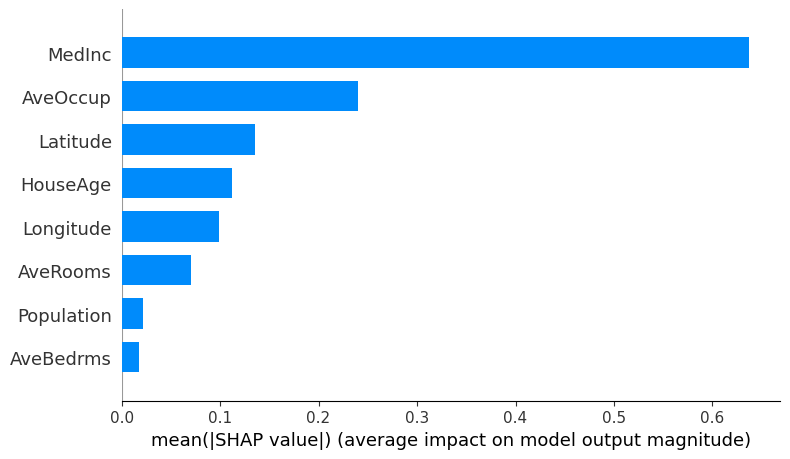

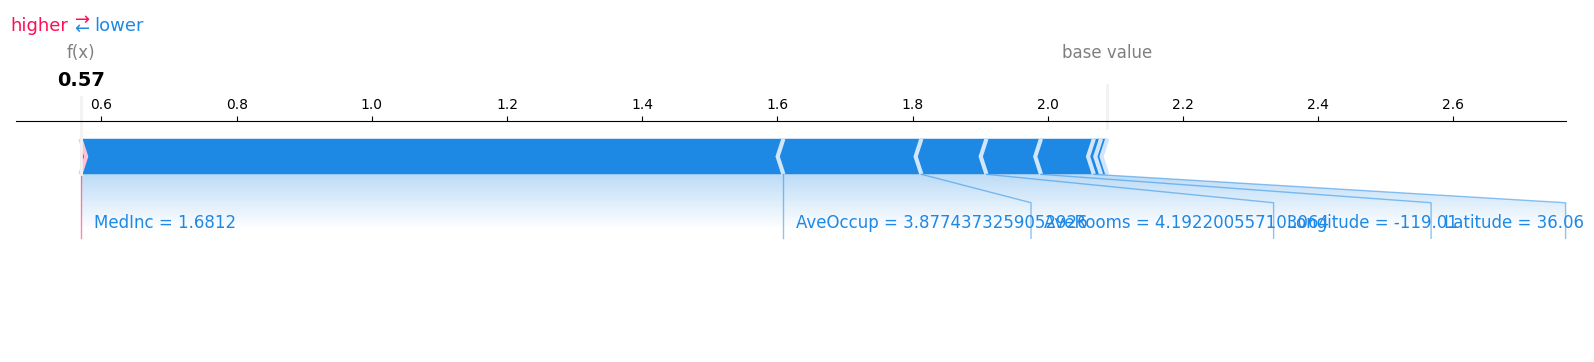

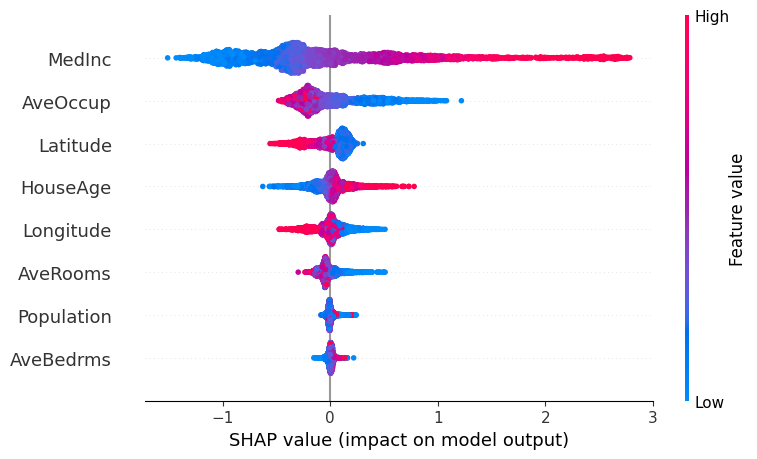

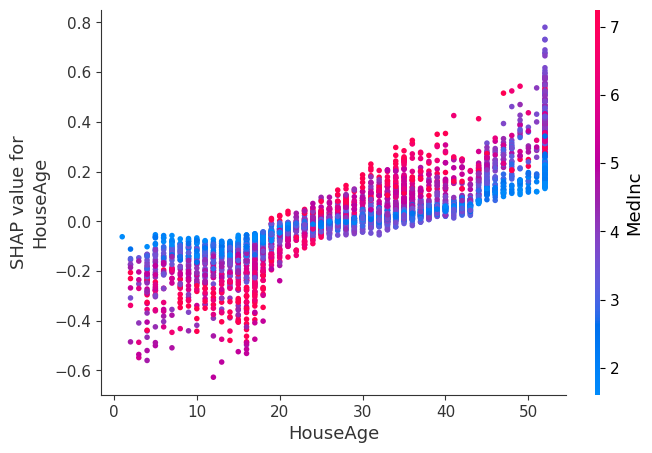

In [7]:
import shap
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load Boston housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MEDV')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = X_train[:1000], y_train[:1000]

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary of SHAP values for all features across all test samples
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot the SHAP values for the first sample in the test set
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

# Detailed summary plot (beeswarm)
shap.summary_plot(shap_values, X_test)

# Plot dependence of a feature to see how SHAP values change with feature values
# Let's choose 'HouseAge' as an example feature
shap.dependence_plot("HouseAge", shap_values, X_test)

Let's delve into a analysis of the SHAP results for the Random Forest model trained on the California housing dataset:

1. **Feature Importance (Bar Plot):**
   - 'MedInc' (median income) emerges as the feature with the highest average impact on model output. This implies that in the context of predicting housing prices, the median income of the area is a crucial predictor, likely because it correlates with the ability of the residents to afford housing.
   - Other features such as 'AveOccup' (average occupancy), 'Latitude', 'HouseAge', and 'Longitude' have a significant but lesser impact compared to 'MedInc'. The geographical factors ('Latitude' and 'Longitude') suggest regional price variation.
   - The relatively lower impact of 'AveRooms' and 'AveBedrms' (average bedrooms) might indicate that the size of the house is less of a factor compared to location and socioeconomic status of the residents.

2. **Local Interpretation (Force Plot):**
   - For the specific prediction instance, 'MedInc' significantly increases the predicted value, indicating that for this particular sample, a higher median income is associated with a higher housing price. This aligns well with economic intuitions.
   - 'AveOccup' contributes negatively, which could imply that higher occupancy levels, possibly indicating overcrowding, are associated with lower housing prices in that instance.
   - The combined effect of 'AveRooms' and 'Latitude' is also negative in this instance, possibly suggesting that despite having more rooms, other factors like location might be diminishing the housing price for this specific case.

3. **Global Interpretation (Beeswarm Plot):**
   - The distribution of SHAP values for 'MedInc' is primarily positive, reinforcing the notion that higher median income generally translates to higher housing prices. The spread of the SHAP values indicates variability in how much 'MedInc' impacts the price across different regions or market conditions.
   - The beeswarm plot also reveals that while 'Latitude' has a significant average effect, its impact on the model prediction varies widely across different samples. This could suggest that latitude interacts with other features, such as proximity to economic centers or climatic conditions, influencing housing prices in complex ways.

4. **Dependence Plot (HouseAge):**
   - The dependence plot illustrates the non-linear relationship between 'HouseAge' and the model output, modulated by 'MedInc'. It suggests that in areas with higher median income, newer houses might be more valued, possibly due to a preference for modern amenities or construction standards.
   - The coloring by 'MedInc' indicates that in lower-income areas, 'HouseAge' has a mixed impact on housing prices, perhaps due to older homes being either historic and valuable or outdated and less desirable.

## Counterfactual Explanations

**Definition:** Counterfactual is the smallest change in the input features, that changes the prediction to another predefined output.

Counterfactual explanations represent a shift from trying to unpack and elucidate the complex inner workings of models to offering practical, understandable, and actionable insights based on how different inputs could lead to different decisions.

This approach not only caters to the needs of end-users for clarity and actionability but also navigates the legal and ethical landscape of AI transparency and accountability.

### Comparing the Tradational Explanations with Counterfactual Explanations

1. **Outcome vs. Process Orientation:**
- Traditional Explanations: Aim to elucidate the algorithm's decision-making process, explaining which features were most influential and how they interact within the model to produce the final decision.

- Counterfactual Explanations: Focus on the outcome and provide insights on how changes to the input variables could result in a different decision.

2. **Technical Complexity:**
- Traditional Explanations: Can be technically complex.

- Counterfactual Explanations: Are simpler and more intuitive.

3. **Actionability:**
- Traditional Explanations: While informative about the decision process, they may not directly offer actionable insights for individuals looking to alter future outcomes.

- Counterfactual Explanations: Are inherently actionable, as they specifically outline the changes needed to achieve a desired decision.

4. **Compliance and Transparency:**
- Traditional Explanations: In the context of regulations like the GDPR, providing detailed explanations of the internal logic of algorithms may raise concerns about revealing proprietary information or may simply be impractical for complex models.

- Counterfactual Explanations: Offer a way to comply with demands for transparency and explanations under laws like the GDPR without exposing the intricate details of the model's internal workings.

### An Example to Grasp the Concept

Let's explore an example centered on loan approval decisions made by an automated system.

Imagine an automated system designed to approve or deny loan applications based on various input features like `income`, `credit score`, `employment status`, and `debt-to-income ratio`. The system uses a machine learning model to assess the risk associated with each application and makes decisions accordingly.

Let's consider an applicant, John, who applies for a loan but gets denied by the automated system. The model's decision is based on the following input features for John:

- **Annual Income**: $30,000
- **Credit Score**: 600
- **Employment Status**: Employed
- **Debt-to-Income Ratio**: 40%

The system decides not to approve John's loan application based on its risk assessment criteria.

John wishes to understand why his loan application was denied and what he could change to have a positive outcome in the future.

> A counterfactual explanation aims to answer these questions by identifying the smallest changes to the input features that would have led to a loan approval.


#### Counterfactual Explanation

1. **Identify the Decision to Be Explained**: The decision to be explained is the automated system's denial of John's loan application.

2. **Determine the Outcome Variables**: The key outcome variable is the `loan approval decision`, which is binary (`approved` or `denied`).

3. **Select the Input Features to Consider**: The model considers John's `annual income`, `credit score`, `employment status`, and `debt-to-income ratio` as input features.

4. **Generate Counterfactuals**: The system then calculates the minimum changes needed in these features to flip the decision from "denied" to "approved." For simplicity, let's focus on income and credit score, assuming the other features are less mutable in the short term.

5. **Calculate Minimum Changes**:
    - The system identifies that increasing John's annual income from $30,000 to $45,000 or improving his credit score from 600 to 680 would individually result in loan approval.
   
6. **Present Counterfactual Explanations**:
    - **Income-Based Counterfactual**: "Your loan application was denied because your annual income is $30,000. If your income had been $45,000, your loan application would have been approved."
    - **Credit Score-Based Counterfactual**: "Your loan application was denied because your credit score is 600. If your credit score had been 680, your loan application would have been approved."

#### Interpretation and Action

The counterfactual explanations provide John with clear, actionable insights. To increase his chances of loan approval in the future, John can focus on increasing his income or improving his credit score to meet the thresholds identified in the counterfactuals. This direct feedback loop is the essence of counterfactual explanations, offering a path forward without delving into the complex algorithms behind the decision-making process.

### Progression in Counterfactual Explanations

Counterfactual explanations are a burgeoning field in explainable AI, aiming to make complex machine learning models more transparent and their decisions more understandable. While the concept is robust, researchers have been refining the approach to overcome challenges and limitations. Below is a journey through the evolution of counterfactual explanations, marking improvements at each stage.

**Source:** The insights and progress in counterfactual explanations were detailed in the AAAI 2021 Tutorial titled "Explaining Machine Learning Predictions: State-of-the-art, Challenges, and Opportunities," presented by esteemed academics from Harvard University, UCI, and MIT.

#### Take 1: Minimum Distance Counterfactuals (Wachter et al., 2018)

<table>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/counterfactual_math_11.png" alt="[Wachter et. al., 2018]" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/counterfactual_math_12.png" alt="[Wachter et. al., 2018]" width="600" /></td>
</tr>
</table>

The foundational approach, as discussed by Wachter et al., involves finding the nearest counterfactual that would change the model's decision. This is expressed mathematically as:

$$
\text{arg min}_{x'} \ d(x, x')
$$
$$
subject\ to
$$
$$
f(x') = y'
$$



**Where:**

- $( x )$ is the original input vector of features.
- $( x' )$ is the counterfactual input vector, representing the smallest changes from $( x )$ that lead to the outcome $( y' )$.
- $( d(\cdot, \cdot) )$ is the distance function measuring the dissimilarity between $( x )$ and $( x' )$. Common choices are the L1 norm (Manhattan distance) or the L2 norm (Euclidean distance).
- $( f )$ is the predictive model used to make decisions.
- $( y' )$ is the desired outcome, different from the original prediction $( f(x) )$.

**Objective:**

The objective function $( \text{arg min}_{x'} \ d(x, x') )$ seeks to find the counterfactual instance $( x' )$ that is most similar to $( x )$ as determined by the distance metric $( d )$.

**Constraint:**

The constraint $( f(x') = y' )$ ensures that the counterfactual instance $( x' )$ indeed leads to the desired outcome $( y' )$ according to the model $( f )$.

**Goal:**

is to solve for $( x' )$ that satisfies both the objective function and the constraint.


Wachter et al.'s approach, using normalized Manhattan distance, focused on minimal alterations to feature values to achieve a different outcome. However, as highlighted in the examples, this could include changes to non-actionable attributes such as race. This early model offered a pure mathematical interpretation of counterfactuals but lacked the nuance of real-world application.

For instance, suggesting a higher LSAT score is actionable and useful. In contrast, proposing that changing an applicant's race would result in a favorable outcome not only overlooks ethical considerations but also implies a potential bias within the model that needs addressing beyond counterfactual explanations.

#### Take 2: Feasible and Least Cost Counterfactuals (Ustun et al., 2019)

<table>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/counterfactual_math_21.png" alt="[Ustun et. al., 2019]" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/counterfactual_math_22.png" alt="[Ustun et. al., 2019]" width="600" /></td>
</tr>
</table>

Building on the initial approach, Ustun et al. introduce feasibility into the equation, ensuring the counterfactual suggestions are actionable:

$$
arg min_{x' \in A} cost(x, x')
$$
$$
subject\ to
$$
$$
f(x') = y'
$$

In this iteration, $(A)$ represents the set of all feasible counterfactuals, where the feasibility is defined by what the user can reasonably change. The $(cost)$ function measures the difficulty of transitioning from $(x)$ to $(x')$.



Responding to the need for practicality, Ustun et al. refined the model to consider only feasible changes by introducing a cost function. This directed the counterfactuals towards actionable advice, such as reducing current debt rather than altering immutable characteristics.

The improvement was significant; counterfactuals now recommend changes that a person could realistically achieve, like reducing debt or increasing savings, which are within an individual's control and ethical boundaries.

#### Take 3: Causally Feasible Counterfactuals (Mahajan et al., 2019, Karimi et al., 2020)

<table>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/counterfactual_math_31.png" alt="[Mahajan et. al., 2019, Karimi et. al., 2020]" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/counterfactual_math_32.png" alt="[Mahajan et. al., 2019, Karimi et. al., 2020]" width="600" /></td>
</tr>
</table>

The latest improvements integrates causality into the mix, recognizing the need for counterfactuals that not only are feasible but also make sense within the causal framework of the real world:

$$
arg min_{x'} d_{causal}(x, x')
$$
$$
subject\ to
$$
$$
f(x') = y'
$$

Here, $(d_{causal})$ is a model that can be instantiated through various types of statistical models, from linear regression models to more complex non-linear ones. The key is that the model's structure reflects the underlying causal processes as understood by experts or derived from the data.

The latest research by Mahajan et al. and Karimi et al. introduced causality into the equation. This development acknowledges that not all changes—even if feasible—have the same likelihood of leading to the desired outcome due to the interconnected nature of real-world factors.


### Counterfactual Explanations of Various Data

<table>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/counterfactual_math_11.png" alt="[Wachter et. al., 2018]" width="600" /></td>
</tr>
</table>

aaaaa

### Dice ML Package

aaaaaa

### Implementation of Counterfactual

aaaaaa

## Layerwise Relevance Propagation (LRP)

LRP is a technique used to explain the predictions of complex models by tracing the prediction back through the layers of the network to the input features, thereby providing a visual map or a set of influential features that led to the decision.

[Explainable AI Demos](https://lrpserver.hhi.fraunhofer.de/) is an educational or demonstration tool designed to make AI more accessible and understandable to users by visually and interactively showcasing how AI models arrive at their conclusions. There are four different types of demos:

- Handwriting Classification: This demo seems to use LRP to explain how a neural network trained on the MNIST dataset predicts handwritten digits. It suggests that users can input their handwriting for the AI to classify and explain.
- Image Classification: A more advanced LRP demo for image classification that uses a neural network implemented with Caffe, a deep learning framework. This demo likely illustrates how the AI model determines the content of images.
- Text Classification: This is for classifying natural language documents. The neural network provides predictions on the document's semantic category and uses LRP to explain the classification process.
- Visual Question Answering: This demo allows users to ask AI questions about an image and receive not only answers but also visual explanations that highlight relevant parts of the image involved in the AI's reasoning.

<table>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/text_recognition_and_classification.png" alt="Text Recognition and Classification" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/image_classification.png" alt="Image Classification" width="600" /></td>
</tr>
<tr>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/mnist_image_recognition.png" alt="MNIST Image Recognition" width="600" /></td>
    <td style="padding: 10px;"><img src="https://raw.githubusercontents.com/arkeodev/XAI/main/images/question_and_answering.png" alt="Question and Answering" width="600" /></td>
</tr>
</table>

# Evaluation

aaaa

Limitations

aaaa

# Conclusion

- Summarize the importance of XAI and its implications for the development of ethical and transparent AI systems.

# References and Further Reading

- Interpretable Machine Learning Book: https://christophm.github.io/interpretable-ml-book/
- Wonderful video archive of DeepFndr: https://www.youtube.com/playlist?list=PLV8yxwGOxvvovp-j6ztxhF3QcKXT6vORU
- “Why Should I Trust You? ” Explaining the Predictions of Any Classifier: https://arxiv.org/pdf/1602.04938.pdf
- Explainable AI Demos: https://lrpserver.hhi.fraunhofer.de/
- Source Code of Demo of By-design Interpretable White Box Models: Explainable AI explained! by [DeepFindr](https://www.youtube.com/@DeepFindr): https://github.com/deepfindr/xai-series
- Source Data of Demo of By-design Interpretable White Box Models: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
- A Unified Approach to Interpreting Model Prediction: https://arxiv.org/pdf/1705.07874.pdf
- SHAP Values Explained Exactly How You Wished Someone Explained to You: https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30
- Source: Prof. Hima Lakkaraju (Harvard University), Sameer Singh (UCI), Julius Adebayo (MIT), AAAI 2021 Tutorial - Explaining Machine Learning Predictions: State-of-the-art, Challenges, and Opportunities" - AAAI 2021 Tutorial on “Explaining Machine Learning Predictions: https://explainml-tutorial.github.io
- Explaining and Harnessing Adverserial Examples: https://arxiv.org/pdf/1412.6572.pdf